# Importing Data

In [80]:
import pandas as pd
data = pd.read_csv("C:\\Users\\acer\\titanic-passengers.csv",sep=";")

# Showing The Head Of The Data

In [81]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


# Information About The Data

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


# Creating Title Column

In [83]:
data['Title'] = data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

Title_Dictionary = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
data.Title = data.Title.map(Title_Dictionary)
print(data.Title.value_counts())

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64


# Getting The Median Age Based On The Sex Pclass And Title

In [84]:
grouped = data.groupby(['Sex','Pclass', 'Title'])  
grouped.Age.median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    40.5
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64

# Replace Age By The Median Age

In [85]:
# apply the grouped median value on the Age NaN
data.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

In [86]:
# fill Cabin NaN with U for unknown
data.Cabin = data.Cabin.fillna('U')
# find most frequent Embarked value and store in variable
most_embarked = data.Embarked.value_counts().index[0]

# fill NaN with most_embarked value
data.Embarked = data.Embarked.fillna(most_embarked)
# fill NaN with median fare
data.Fare = data.Fare.fillna(data.Fare.median())

# view changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 90.6+ KB


# Converting Categorical Data Into Numerical

In [87]:
data.Cabin = data.Cabin.map(lambda x: x[0])

In [88]:
data.Sex = data.Sex.map({"male": 0, "female":1})
pclass_dummies = pd.get_dummies(data.Pclass, prefix="Pclass")
title_dummies = pd.get_dummies(data.Title, prefix="Title")
cabin_dummies = pd.get_dummies(data.Cabin, prefix="Cabin")
embarked_dummies = pd.get_dummies(data.Embarked, prefix="Embarked")
titanic_dummies = pd.concat([data, pclass_dummies, title_dummies, cabin_dummies, embarked_dummies], axis=1)

# Drop Categorical
titanic_dummies.drop(['Pclass', 'Title', 'Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

titanic_dummies.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,343,No,0,28.0,0,0,13.0000,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,76,No,0,25.0,0,0,7.6500,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,641,No,0,20.0,0,0,7.8542,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,568,No,1,29.0,0,4,21.0750,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,672,No,0,31.0,1,0,52.0000,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_age_sex = sns.lineplot(x="sex",y="age",data=data)

ValueError: Could not interpret input 'sex'

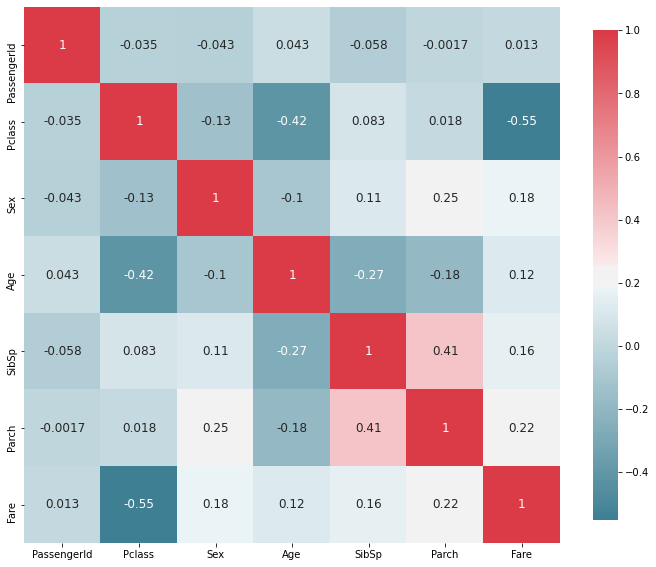

In [96]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(data)

In [ ]:
""""

This heatmap gives us the amount of correlation between each 
field inside our dataset, and also we could notice that the correlation 
that is shown is a negative correlation

"""

# The Median Betweeen The Survived And Pclass

In [98]:
grouped = data.groupby(['Survived','Pclass'])  
grouped.Age.median()

Survived  Pclass
No        1         40.0
          2         31.0
          3         26.0
Yes       1         36.0
          2         28.0
          3         20.0
Name: Age, dtype: float64

# Creating FamilySize

In [102]:
data['FamilySize'] = data.Parch + data.SibSp + 1

# Visualize The New Data

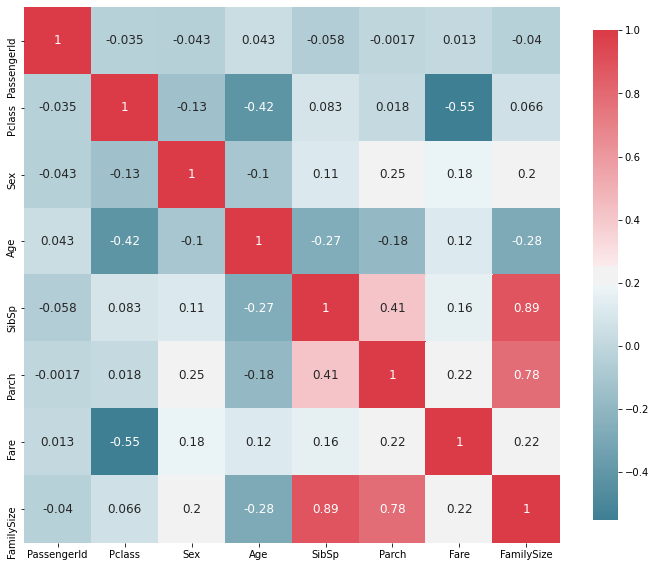

In [103]:
plot_correlation_map(data)